Load the preprocessed data

In [38]:
import pandas as pd

df = pd.read_csv('../../data/preprocessed_data.csv')

Numerical Features

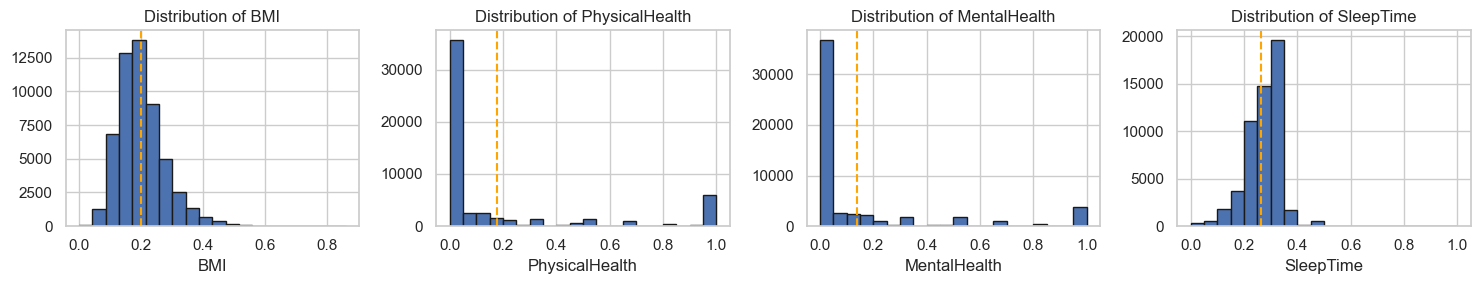

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numerical_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

plt.figure(figsize=(15, 3))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 4, i + 1)
    plt.hist(df[feature], bins=20, edgecolor='k')
    plt.axvline(df[feature].mean(), color='orange', linestyle='dashed', label='Mean')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

Categorical Features

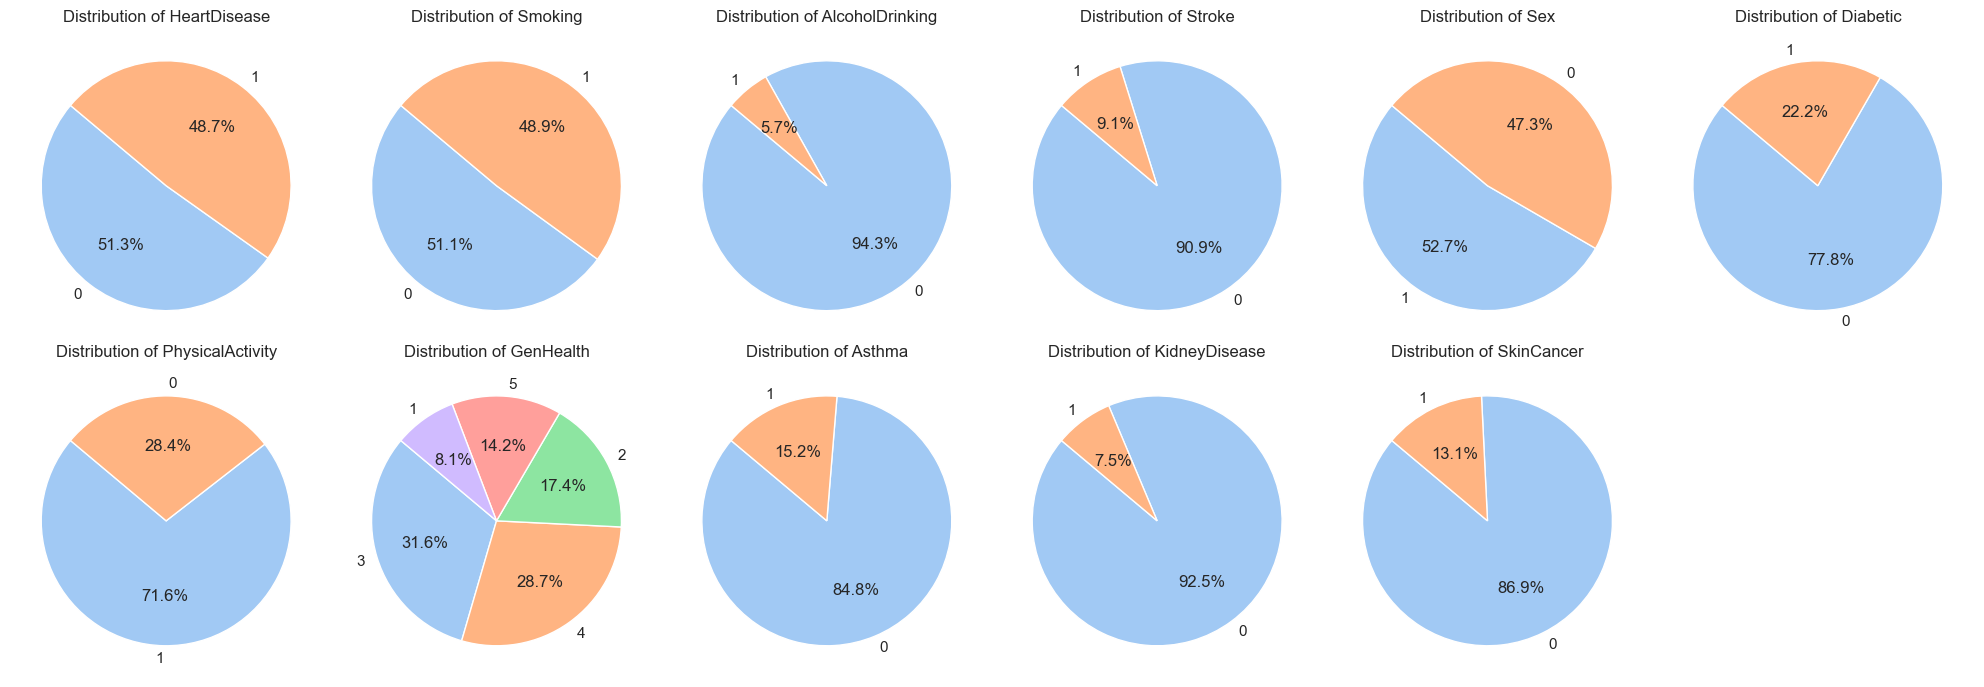

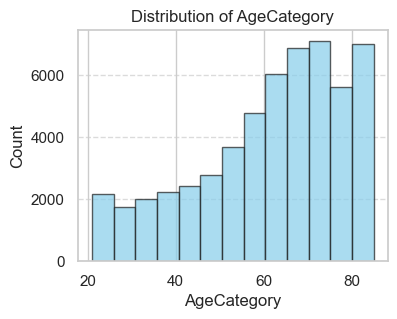

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the number of columns per row
columns_per_row = 5

categorical_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'Sex', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

plt.figure(figsize=(20, 7))  # Increase the width of the figure to accommodate 5 charts per row

for i, feature in enumerate(categorical_features):
    plt.subplot(2, len(categorical_features) // 2 + 1, i + 1)  # Use // for integer division
    feature_counts = df[feature].value_counts()
    labels = feature_counts.index
    sizes = feature_counts.values
    colors = sns.color_palette('pastel')[0:len(labels)]
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Plot a histogram for the "AgeCategory" feature
plt.figure(figsize=(4,3))
plt.hist(df['AgeCategory'], bins=13, edgecolor='k', color='skyblue', alpha=0.7)
plt.title('Distribution of AgeCategory')
plt.xlabel('AgeCategory')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


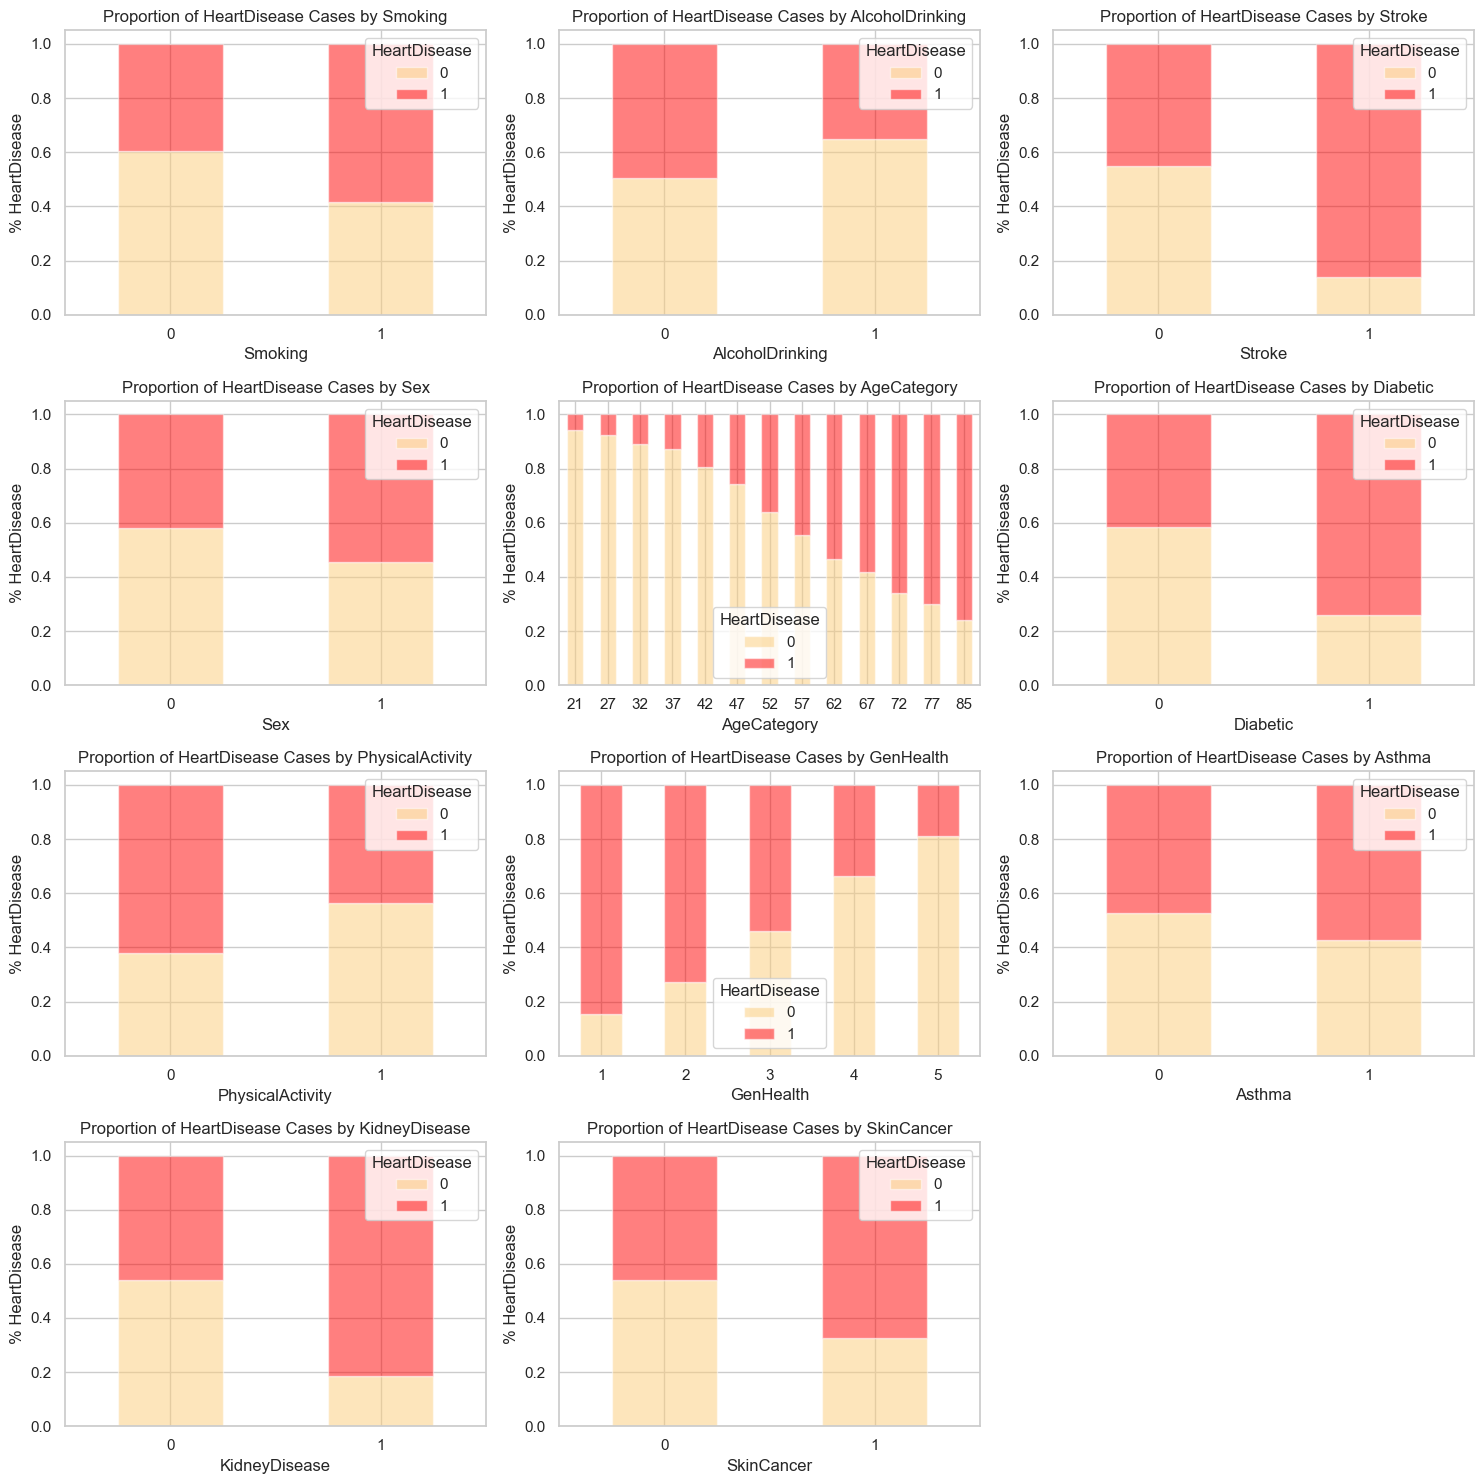

In [41]:
import matplotlib.pyplot as plt

categorical_features_to_show = ['Smoking', 'AlcoholDrinking', 'Stroke', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Create a subplot with multiple axes to display the plots for each feature
num_features = len(categorical_features_to_show)
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# Flatten the axes for easier indexing
axes = axes.flatten()

for i, feature in enumerate(categorical_features_to_show):
    grouped_data = df.groupby([feature, 'HeartDisease']).size().unstack()
    proportion_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)
    
    ax = axes[i]
    
    # Create the plot
    proportion_data.plot(kind='bar', stacked=True, ax=ax, color=['#fccc79', 'red'], alpha=0.5)
    
    # Set labels and title
    ax.set_xticklabels(proportion_data.index, rotation=0)
    ax.set_xlabel(feature)
    ax.set_ylabel("% HeartDisease")
    ax.set_title(f"Proportion of HeartDisease Cases by {feature}")
    
# Remove empty subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust subplot layout
fig.tight_layout()
plt.show()
